In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/users/aqib/desktop/ucsb/research/bccl/dmd_codes')
from monomials import Monomials
from monomials import Monomials_xu
import seaborn as sn

# DMD with control

In [2]:
def calc_Input_Koopman(data_x_p,data_x_f,data_u,data_xu):
    # right now this functions only takes data from a single trajectory, need to update to handle multiple
    
    n,m,l = data_x_p.shape
    p = data_u.shape[0]
    q = data_xu.shape[0]
    
    data_x_p = data_x_p.reshape((n,m*l),order='F')
    data_x_f = data_x_p.reshape((n,m*l),order='F')
    data_u = data_u.reshape((p,m*l),order='F')
    data_xu = data_xu.reshape((q,m*l),order='F')
    
    Omega = (np.vstack((data_x_p,data_xu,data_u)))
    
    K = data_x_f @ np.linalg.pinv(Omega)
    
    A = K[:,0:K.shape[0]]
    B = K[:,K.shape[0]:]
    
    return ([K,A,B]);

#  ODEs

In [46]:
global Kd, gamma, k0, k1

Kd = 0.5
gamma = np.random.normal(0.03,0.01)
k0 = np.random.normal(0.02,0.01)
k1 = np.random.normal(0.03,0.01)
ku = np.random.normal(0.03,0.01)

# def u_input(length_t):
#     u = np.random.uniform(-1,1,length_t)

def iff_loop(x,t,u): 
    
    Adot = k0*u - gamma*x[0]
    Bdot = k1*u/(1+x[0]/Kd) - gamma*x[1]
    
    for t 
    
    return ([Adot,Bdot])
    

# numerically integrate the ODEs

0.0
0.0001224997147218533
0.0001224997147218533
0.0002449994294437066
0.0002449994294437066
0.04081713605390579
0.04081713605390579
0.08138927267836787
0.08138927267836787
0.12196140930282996
0.12196140930282996
0.2630971078862299
0.2630971078862299
0.4042328064696299
0.4042328064696299
0.3732688913361188
0.3732688913361188
0.48344067478600766
0.48344067478600766
0.5936124582358966
0.5936124582358966
0.7037842416857855
0.7037842416857855
0.9241278085855632
0.9241278085855632
1.144471375485341
1.144471375485341
1.3648149423851188
1.3648149423851188
1.5851585092848965
1.5851585092848965
1.8055020761846743
1.8055020761846743
2.234316856944721
2.234316856944721
2.663131637704768
2.663131637704768
3.091946418464815
3.091946418464815
3.5207611992248617
3.5207611992248617
3.9495759799849086
3.9495759799849086
4.3783907607449555
4.3783907607449555
4.9904676896124505
4.9904676896124505
5.6025446184799454
5.6025446184799454
6.21462154734744
6.21462154734744
6.826698476214935
6.826698476214935
7.

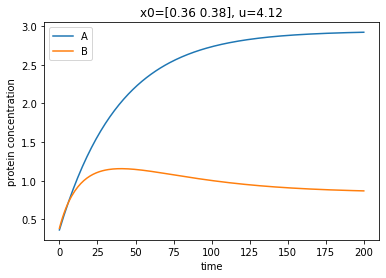

In [47]:
numStates = 2
numInputs = 1

tStart = 0.0
tEnd = 200
numTimesteps = tEnd
numTimepoints = np.int(numTimesteps)
tSpan = np.linspace(tStart,tEnd,numTimepoints)

numTrajectories = 1

uvec = []
data = np.empty(shape=[numStates,numTimepoints,0])
for traj in range(0,numTrajectories):
#     u={}
#     for t in tSpan:
#         u[t] = np.random.uniform(10,0.01) 
    u = np.random.uniform(10,0.01)
    uvec.append(u)
    x0 = np.random.uniform(1,0.01,numStates)
    x = odeint(iff_loop,x0,tSpan,args=(u,))
    x = x.T[:,:,np.newaxis]
    data = np.append(data,x,axis=2)
    
    if numTrajectories < 21:
        plt.figure();
        h = plt.plot(tSpan,data[:,:,traj].T);
        plt.legend((h[0],h[1]),('A','B'));
        plt.xlabel('time');
        plt.ylabel('protein concentration');
        plt.title('x0=' + str(np.round(x0,2)) +', ' + 'u=' + str(round(u,2)))
# uvec = np.array(uvec)


In [34]:
u

{0.0: 4.974259836897074,
 1.0050251256281406: 4.749777388683955,
 2.0100502512562812: 6.295885532608208,
 3.015075376884422: 9.330235358944956,
 4.0201005025125625: 6.452519988028124,
 5.025125628140703: 6.709514370939111,
 6.030150753768844: 9.621917027160418,
 7.035175879396984: 0.04232479755898666,
 8.040201005025125: 9.721840916438326,
 9.045226130653266: 1.4807158696070637,
 10.050251256281406: 3.199526080821874,
 11.055276381909547: 2.9877692099440063,
 12.060301507537687: 0.7136008885196414,
 13.065326633165828: 9.69943849299376,
 14.070351758793969: 5.994096906296087,
 15.07537688442211: 1.1807865710481735,
 16.08040201005025: 9.914745830880939,
 17.08542713567839: 0.1285192984122503,
 18.09045226130653: 2.0906967159908083,
 19.09547738693467: 4.570459791397517,
 20.100502512562812: 4.988495168655412,
 21.105527638190953: 4.8183360394191395,
 22.110552763819094: 6.494539506631941,
 23.115577889447234: 7.208748712995016,
 24.120603015075375: 5.84296918095628,
 25.125628140703515

## identify A and B using input Koopman formulation

In [ ]:
train_start = 0
train_stop = round(0.95*numTimepoints)
train_step = 25
train_indices = np.arange(train_start, train_stop+train_step, train_step)
max_train_index = train_indices[-1]

polyorder_x = 3
polyorder_u = 1

psi_x_p = Monomials(data[:,0:max_train_index],polyorder_x)
psi_x_f = Monomials(data[:,1:max_train_index+1],polyorder_x)
psi_u = Monomials(uvec*np.ones((numInputs,data[:,0:max_train_index].shape[1],numTrajectories)),polyorder_u)
psi_xu = Monomials_xu(psi_x_p,psi_u)

numObs_x = psi_x_p.shape[0]
numObs_u = psi_u.shape[0]
numObs_xu = psi_xu.shape[0]

In [ ]:
K,A,B = calc_Input_Koopman(psi_x_p,psi_x_f,psi_u,psi_xu)

In [ ]:
plt.figure();
sn.heatmap(K);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim(); # get the top and bottom location 
b += 0.5; # Add 0.5 to the bottom
t -= 0.5; # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values

# one-step prediction

In [ ]:
psi_x_p_test = Monomials(data[:,max_train_index+1:data.shape[1]-1],polyorder_x)
psi_x_f_test = Monomials(data[:,max_train_index+2:data.shape[1]],polyorder_x)
psi_u_test = Monomials(uvec*np.ones((numInputs,data[:,max_train_index+1:data.shape[1]-1].shape[1],numTrajectories)),polyorder_u)
psi_xu_test = Monomials_xu(psi_x_p_test,psi_u_test)

traj = 0

psi_x_f_pred = np.dot(K,np.squeeze((np.vstack((psi_x_p_test[:,:,traj],psi_xu_test[:,:,traj],psi_u_test[:,:,traj])))))

numObservables = psi_x_p_test.shape[0] 

predSpan = np.linspace(tSpan[max_train_index],tSpan[-1],psi_x_f_pred.shape[1])

for i in range(0,numObs_x):
    obsInd_temp = np.int(i)
    plt.figure()
    plt.plot(predSpan,psi_x_f_test[obsInd_temp,:,traj],'.');
    plt.plot(predSpan,psi_x_f_pred[obsInd_temp,:]);
    plt.gca().legend(('True','Identified'));
    plt.title('Observable function index = ' + str(obsInd_temp))
    plt.xlabel('Time')
    plt.ylabel('Psi')
    plt.grid(False)

# Does the model work for a new initial condition, new input? (does good for a new initial condition with same input. Does bad with new inputs).

In [ ]:
x0 = np.random.uniform(1,0.01,numStates)
# u = np.random.uniform(10,1)

x = odeint(iff_loop,x0,tSpan)
data = x.T

plt.figure();
h = plt.plot(tSpan,data.T);
plt.legend((h[0],h[1]),('A','B'));
plt.xlabel('time');
plt.ylabel('protein concentration');

In [ ]:
psi_x_p = Monomials(data[:,0:data.shape[1]-2],polyorder_x)
psi_x_f = Monomials(data[:,1:data.shape[1]-1],polyorder_x)
psi_u = Monomials(u*np.ones((1,data[:,0:data.shape[1]-2].shape[1])),polyorder_u)
psi_xu = Monomials_xu(psi_x_p,psi_u)

In [ ]:
psi_x_f_pred = np.dot(K,np.squeeze((np.vstack((psi_x_p,psi_xu,psi_u)))))

for i in range(0,numObs_x):
    obsInd_temp = np.int(i)
    plt.figure()
    plt.plot(psi_x_f[obsInd_temp,:],'.');
    plt.plot(psi_x_f_pred[obsInd_temp,:]);
    plt.gca().legend(('True','Identified'));
    plt.title('Observable function index = ' + str(obsInd_temp))
    plt.xlabel('Time')
    plt.ylabel('Psi')
    plt.grid(False)
    plt.xlim([0,20])
    

# N-step prediction

In [ ]:
psi_x_p = np.squeeze(Monomials(data[:,0:data.shape[1]-2],polyorder_x),2)
psi_x_f = np.squeeze(Monomials(data[:,1:data.shape[1]-1],polyorder_x),2)
psi_u = np.squeeze(Monomials(u*np.ones((1,data[:,0:data.shape[1]-2].shape[1])),polyorder_u),2)
psi_xu = np.squeeze(Monomials_xu(psi_x_p,psi_u),2)

T = 10
predSpan = np.linspace(0,T-1,T)
obsInd = 0

psi_x_f_pred = psi_x_p[:,0].reshape(len(psi_x_p[:,0]),1)
psi_xu_pred = psi_xu[:,0].reshape(len(psi_xu[:,0]),1)
plt.figure();
for t in range(0,T):
    plt.plot(predSpan[t],psi_x_p[obsInd,t],'o',color='green')
    plt.plot(predSpan[t],psi_x_f_pred[0,:],'o',color='red')
    psi_x_f_pred = np.dot(K,(np.vstack((psi_x_f_pred, psi_xu_pred, psi_u[:,t].reshape(len(psi_u[:,t]),1)))))
    psi_xu_pred = np.squeeze(Monomials_xu(psi_x_f_pred,psi_u[:,t+1].reshape(len(psi_u[:,t+1]),1)),2)